# Load Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

# Data Overview

### 1. Shape and Columns

In [3]:
train.shape, test.shape, gender_submission.shape

((891, 12), (418, 11), (418, 2))

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
gender_submission.columns

Index(['PassengerId', 'Survived'], dtype='object')

### 2. First 5 rows

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 3. Basic info

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


### 4. Missing values

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
gender_submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

### 5. Missing Value Treatment

#### Train dataset:

In [19]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Cabin'] = train['Cabin'].fillna('Unknown')

In [21]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Test dataset:

In [24]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Cabin'] = test['Cabin'].fillna('Unknown')
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [25]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Descriptive Statistics

In [30]:
train.describe() # For numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
train.describe(include=['object'])  # For categorical columns

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,3
top,"Dooley, Mr. Patrick",male,347082,Unknown,S
freq,1,577,7,687,646


In [32]:
test.describe() # For numerical

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
test.describe(include=['object'])  # For categorical columns

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,418,418
unique,418,2,363,77,3
top,"Peter, Master. Michael J",male,PC 17608,Unknown,S
freq,1,266,5,327,270


In [34]:
gender_submission.describe() # For numerical

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


### Value Counts

In [35]:
train['Survived'].value_counts()
train['Pclass'].value_counts()
train['Sex'].value_counts()
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [36]:
test['Pclass'].value_counts()
test['Sex'].value_counts()
test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [37]:
gender_submission['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

# Univariate Analysis and Bivariate Analysis

#### Train dataset:

#### 1. Univariate analysis:

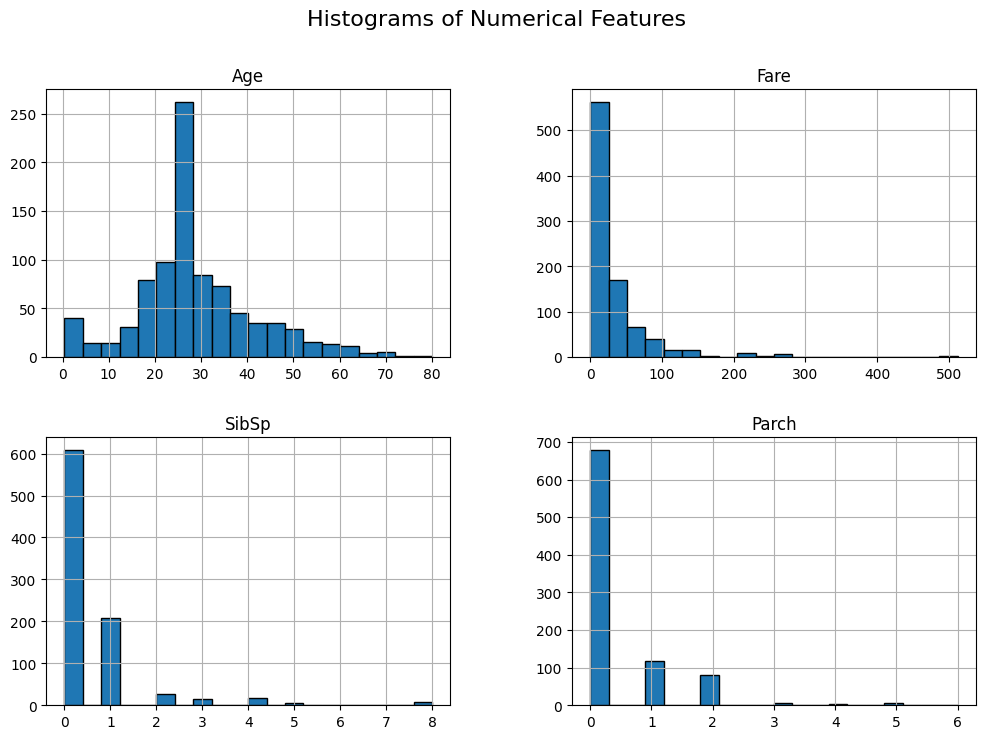

In [39]:
# Histograms for numeric columns
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
train[numeric_cols].hist(bins=20, figsize=(12,8), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

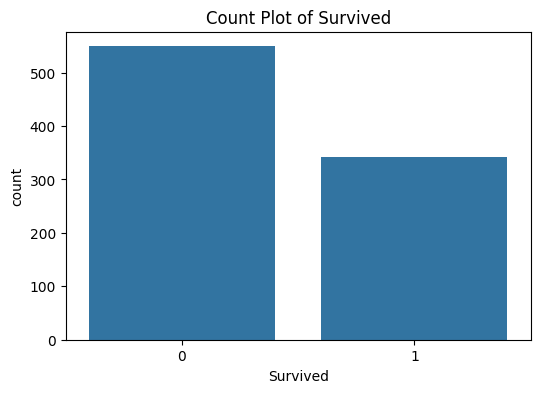

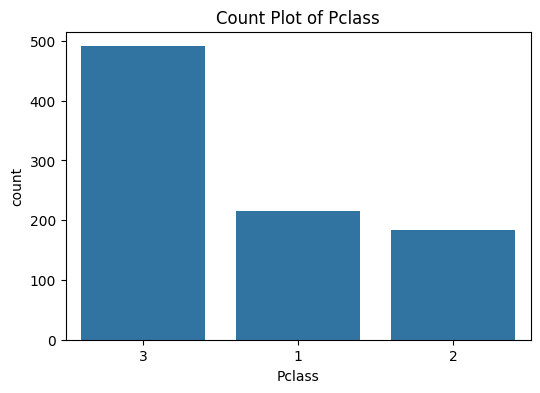

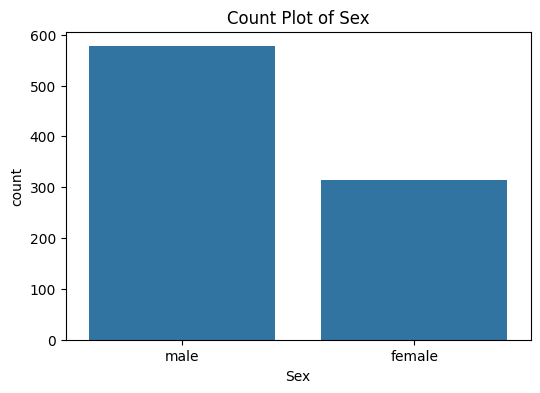

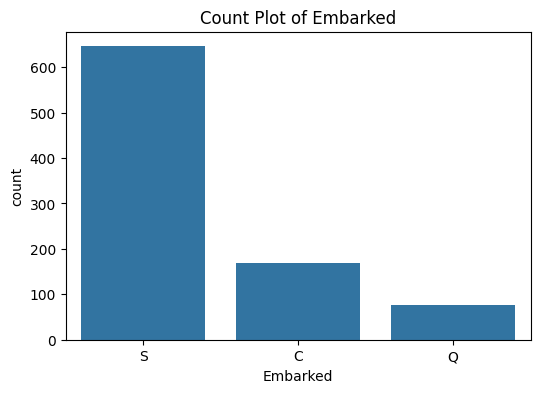

In [40]:
# Count plots for categorical variables
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.show()

#### 2. Bivariate analysis

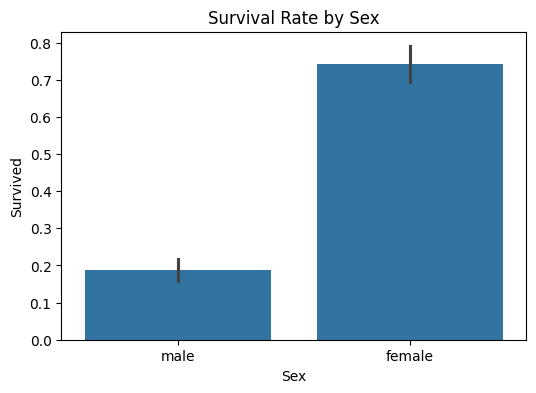

In [42]:
# Survival rate by sex
plt.figure(figsize=(6,4))
sns.barplot(data=train, x='Sex', y='Survived')
plt.title("Survival Rate by Sex")
plt.show()

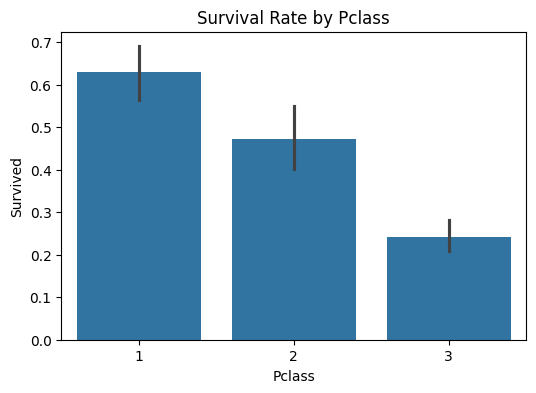

In [43]:
# Survival rate by passenger class
plt.figure(figsize=(6,4))
sns.barplot(data=train, x='Pclass', y='Survived')
plt.title("Survival Rate by Pclass")
plt.show()

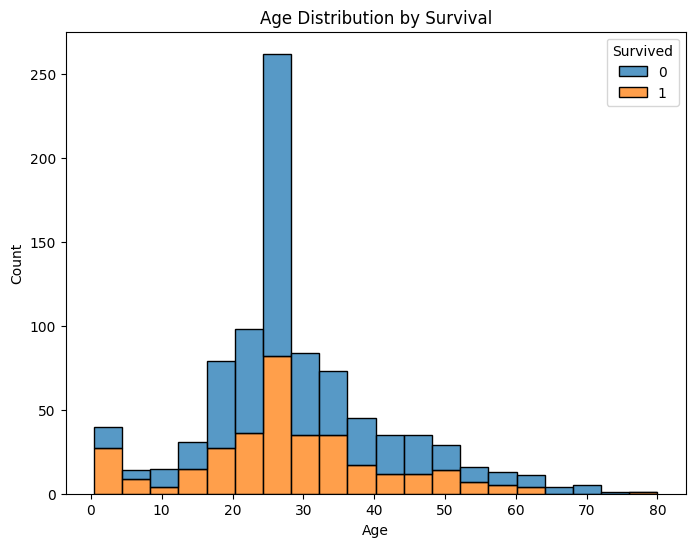

In [44]:
# Age distribution by survival
plt.figure(figsize=(8,6))
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title("Age Distribution by Survival")
plt.show()

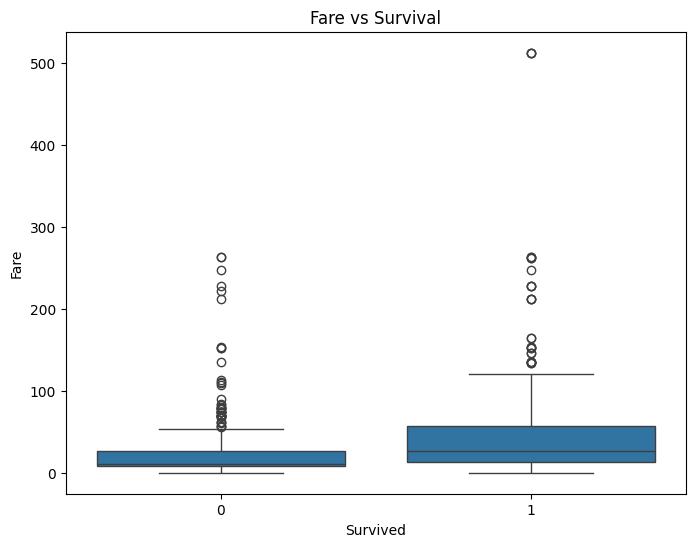

In [45]:
# Fare vs. Survival
plt.figure(figsize=(8,6))
sns.boxplot(data=train, x='Survived', y='Fare')
plt.title("Fare vs Survival")
plt.show()

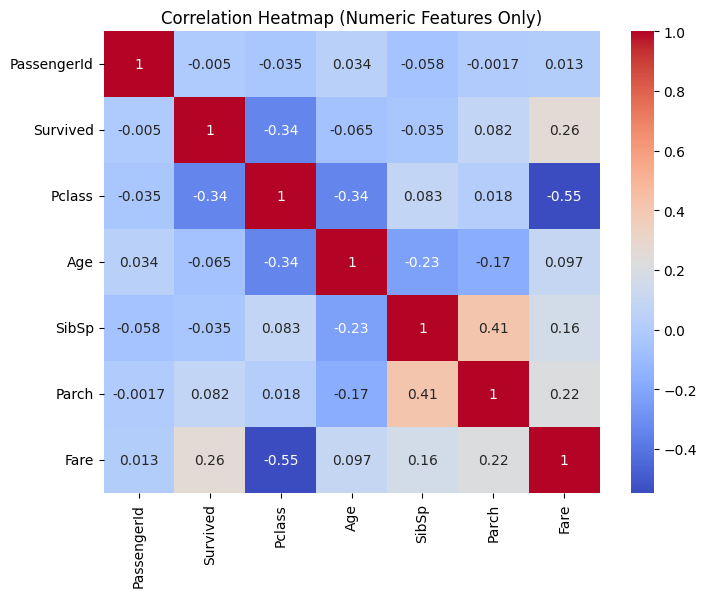

In [47]:
# Select only numeric columns
numeric_df = train.select_dtypes(include=['int64', 'float64'])

# Create correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [59]:
correlation_with_survived = numeric_df.corr()['Survived'].sort_values(ascending=False)
print(correlation_with_survived)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


### Test Dataset

#### 1. Univariate analysis

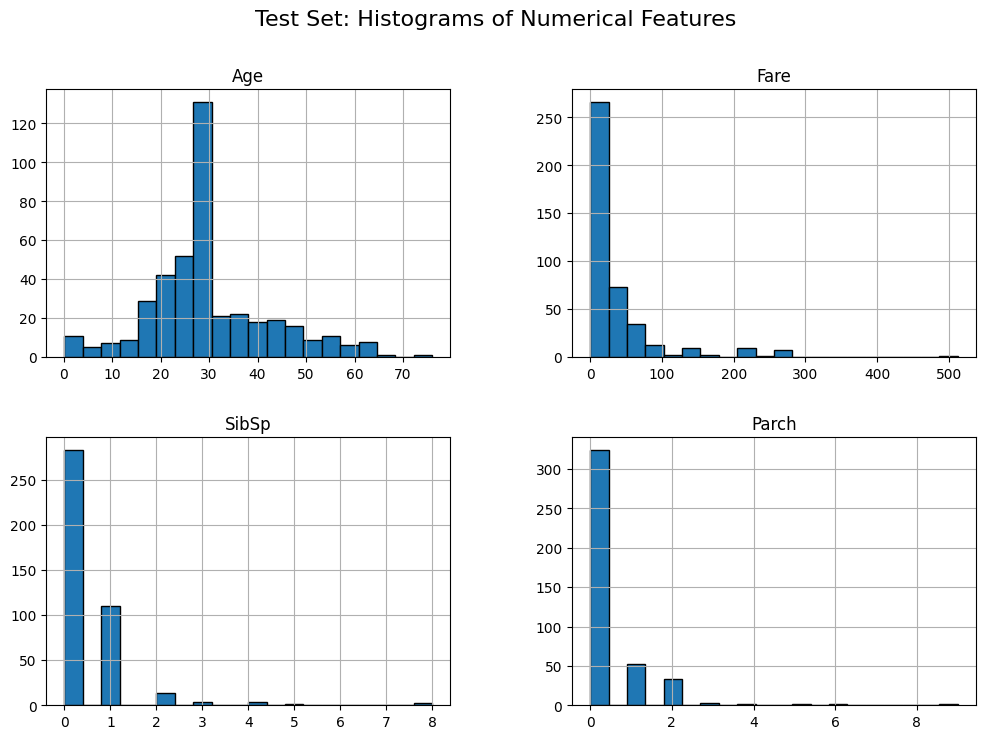

In [49]:
# Histograms for numeric columns
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
test[numeric_cols].hist(bins=20, figsize=(12,8), edgecolor='black')
plt.suptitle("Test Set: Histograms of Numerical Features", fontsize=16)
plt.show()

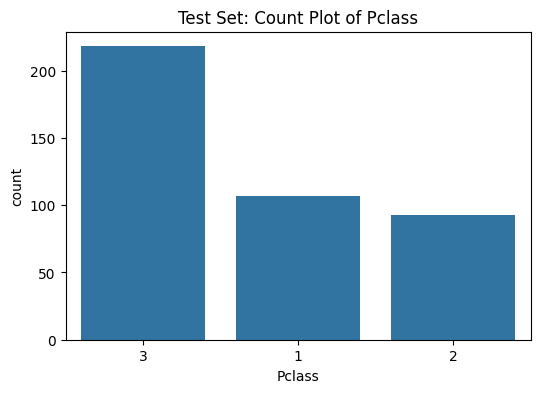

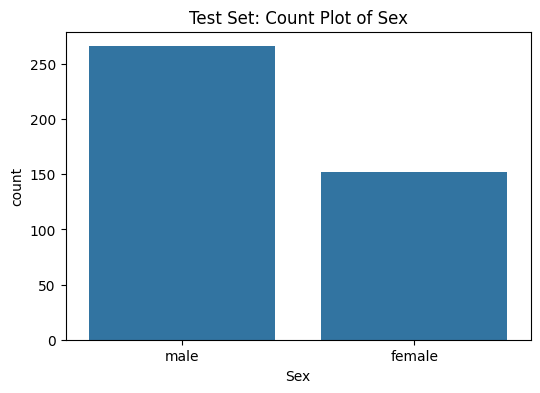

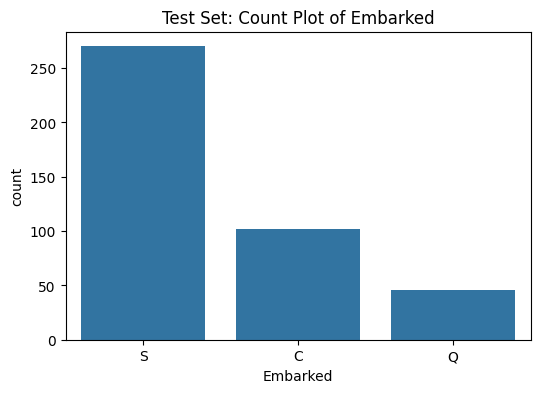

In [50]:
# Count plots for categorical variables
categorical_cols = ['Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=test, x=col, order=test[col].value_counts().index)
    plt.title(f"Test Set: Count Plot of {col}")
    plt.show()

#### 2. Bivariate Analysis (Feature vs. Feature)

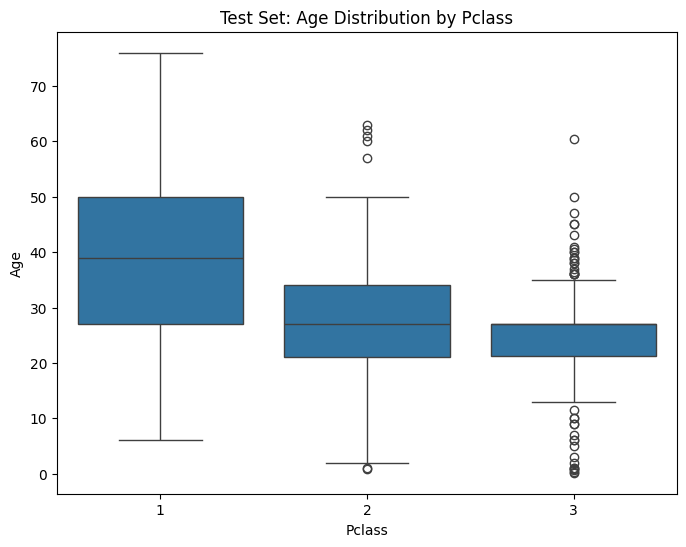

In [51]:
# Age distribution by Pclass
plt.figure(figsize=(8,6))
sns.boxplot(data=test, x='Pclass', y='Age')
plt.title("Test Set: Age Distribution by Pclass")
plt.show()

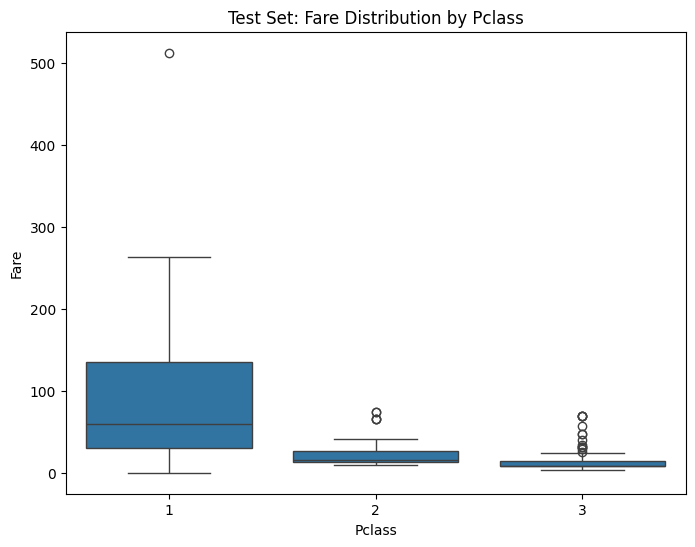

In [52]:
# Fare distribution by Pclass
plt.figure(figsize=(8,6))
sns.boxplot(data=test, x='Pclass', y='Fare')
plt.title("Test Set: Fare Distribution by Pclass")
plt.show()

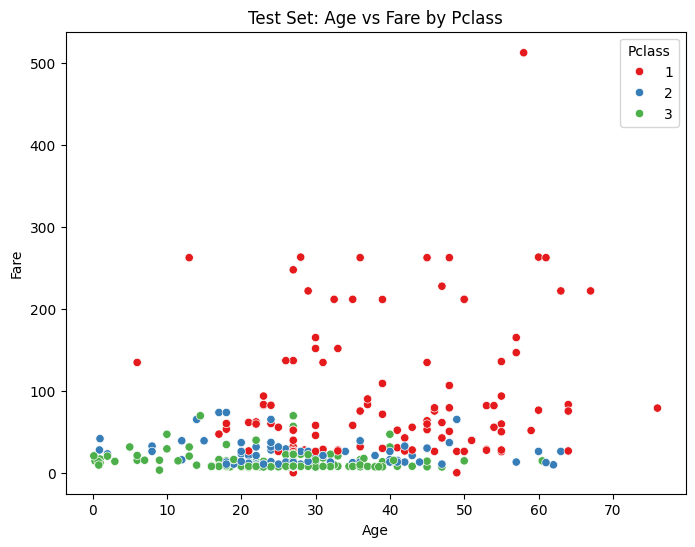

In [53]:
# Age vs Fare scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=test, x='Age', y='Fare', hue='Pclass', palette='Set1')
plt.title("Test Set: Age vs Fare by Pclass")
plt.show()

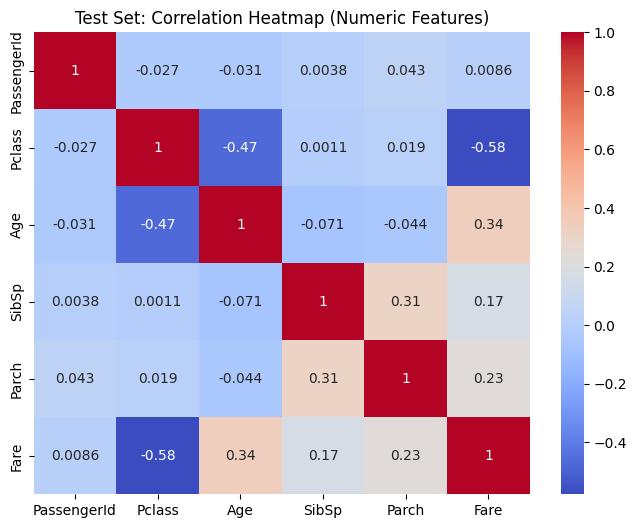

In [54]:
# Correlation heatmap (numeric features only)
numeric_df_test = test.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df_test.corr(), annot=True, cmap='coolwarm')
plt.title("Test Set: Correlation Heatmap (Numeric Features)")
plt.show()

In [60]:
age_by_pclass = test.groupby('Pclass')['Age'].describe()
print(age_by_pclass)

        count       mean        std   min    25%   50%   75%   max
Pclass                                                            
1       107.0  39.747664  13.903877  6.00  27.00  39.0  50.0  76.0
2        93.0  28.681935  12.593273  0.92  21.00  27.0  34.0  63.0
3       218.0  25.009541   8.726613  0.17  21.25  27.0  27.0  60.5


In [61]:
fare_by_pclass = test.groupby('Pclass')['Fare'].describe()
print(fare_by_pclass)

        count       mean        std     min    25%      50%        75%  \
Pclass                                                                   
1       107.0  94.280297  84.435858  0.0000  30.10  60.0000  134.50000   
2        93.0  22.202104  13.991877  9.6875  13.00  15.7500   26.00000   
3       218.0  12.468827  10.779622  3.1708   7.75   7.8958   14.44065   

             max  
Pclass            
1       512.3292  
2        73.5000  
3        69.5500  


In [62]:
numeric_df_test = test.select_dtypes(include=['int64', 'float64'])
correlation_matrix_test = numeric_df_test.corr()
print(correlation_matrix_test)

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.026751 -0.031447  0.003818  0.043080  0.008633
Pclass         -0.026751  1.000000 -0.467853  0.001087  0.018721 -0.577313
Age            -0.031447 -0.467853  1.000000 -0.071197 -0.043731  0.342357
SibSp           0.003818  0.001087 -0.071197  1.000000  0.306895  0.171912
Parch           0.043080  0.018721 -0.043731  0.306895  1.000000  0.230325
Fare            0.008633 -0.577313  0.342357  0.171912  0.230325  1.000000


### Gender_submission Dataset

#### 1. Univariate analysis:

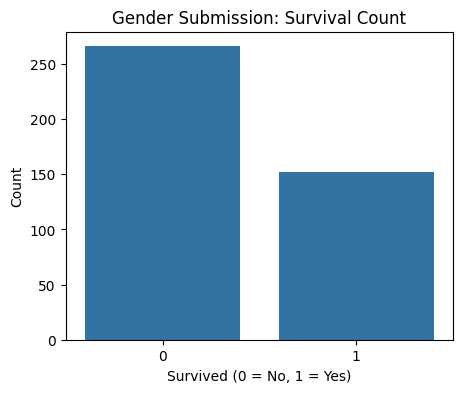

In [55]:
# Count of Survived values
plt.figure(figsize=(5,4))
sns.countplot(data=gender_submission, x='Survived')
plt.title("Gender Submission: Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [56]:
# Show value counts with percentages
surv_counts = gender_submission['Survived'].value_counts()
surv_percent = gender_submission['Survived'].value_counts(normalize=True) * 100
print("Survived counts:")
print(surv_counts)
print("\nSurvived percentages:")
print(surv_percent)

Survived counts:
Survived
0    266
1    152
Name: count, dtype: int64

Survived percentages:
Survived
0    63.636364
1    36.363636
Name: proportion, dtype: float64


#### 2. Bivariate analysis

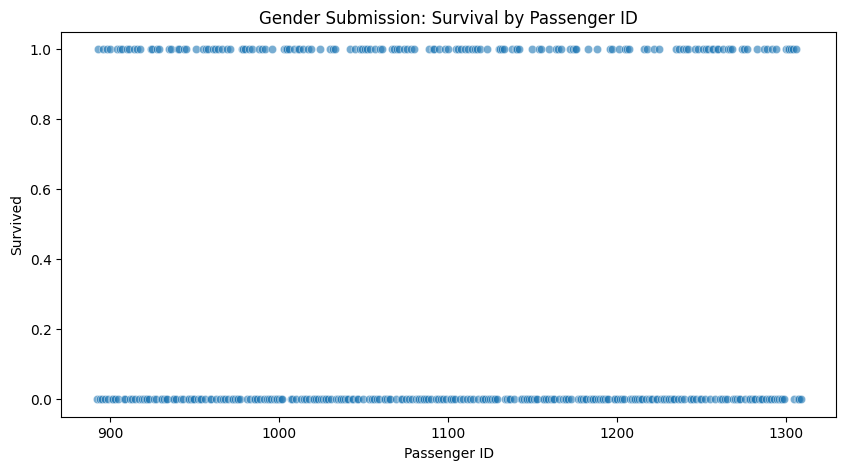

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=gender_submission, x='PassengerId', y='Survived', alpha=0.6)
plt.title("Gender Submission: Survival by Passenger ID")
plt.xlabel("Passenger ID")
plt.ylabel("Survived")
plt.show()

## **Train Dataset – EDA Summary**

### **1. Data Overview**

* The dataset contains 891 passengers with 12 columns, including both numeric and categorical data.
* Key variables: `Survived` (target), `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, and `Embarked`.



### **2. Missing Value Treatment**

* Before cleaning, `Age`, `Cabin`, and `Embarked` had missing values.
* Missing values were handled as follows:

  * `Embarked` filled with the most common value (mode).
  * `Age` filled with the median age.
  * `Cabin` filled with `"Unknown"`.
* After treatment, there were no missing values left in the dataset.



### **3. Descriptive Statistics**

* **Numerical data** shows most passengers were in their late 20s to early 30s, with fares skewed by a few high values.
* **Categorical data** shows:

  * More males than females.
  * Most passengers in `Pclass 3`.
  * Majority embarked from port `S`.
  * Each passenger has a unique name and ticket number.



### **4. Univariate Analysis**

* **Age**: Most passengers are between 20–30 years old. Few are above 60.
* **Fare**: Most paid relatively low fares; only a few paid very high amounts.
* **SibSp/Parch**: Majority traveled without siblings/spouses or parents/children.
* **Survived**: More non-survivors than survivors.
* **Pclass**: `Pclass 3` has the most passengers.
* **Sex**: More males than females.
* **Embarked**: Most passengers boarded from `S`.



### **5. Bivariate Analysis**

* **Survival by Sex**: Females had a much higher survival rate than males.
* **Survival by Age**: Younger adults (20–30) were the most common age group; survival rate varied, but non-survivors outnumbered survivors in most age ranges.
* **Survival by Pclass and Fare**: Higher-class passengers and those paying higher fares were more likely to survive.



### **6. Correlation Analysis**

* `Fare` has the strongest positive correlation with survival.
* `Pclass` shows a strong negative correlation — higher class (lower numeric value) meant better survival odds.
* Other features like `Parch` have a weaker positive correlation, while `SibSp` and `Age` have slight negative correlations.

---

### **Test Dataset - EDA Summary**

#### **1. Missing Value Treatment**

* Filled missing `Age` values with the median age.
* Filled the single missing `Fare` value with the median fare.
* Replaced missing `Cabin` values with `"Unknown"`.
* Verified that there are no missing values after treatment.



#### **2. Univariate Analysis**

* **Age**: Distribution is skewed toward younger ages, with the highest frequency between 20–30 years; very few passengers are above 60.
* **Fare**: Most passengers paid less than 100, with a concentration at the low end of the range.
* **SibSp**: Majority had 0 or 1 sibling/spouse onboard.
* **Parch**: Majority had no parents/children onboard, with a smaller peak at 1–2.
* **Pclass**: Class 3 has the largest number of passengers, followed by Class 1, then Class 2.
* **Sex**: Males outnumber females (roughly 2:1 ratio).
* **Embarked**: Most passengers embarked from port S, then C, with Q being least common.



#### **3. Bivariate Analysis**

* **Age vs. Pclass**: Class 1 passengers are generally older on average than Classes 2 and 3.
* **Fare vs. Pclass**: Class 1 passengers paid significantly higher fares, Class 2 moderate, and Class 3 the lowest.
* **Correlation (Numeric Features)**:

  * Strong negative correlation between `Pclass` and `Fare` (lower class number → higher fare).
  * Moderate positive correlation between `Fare` and `Age`.
  * Positive correlation between `SibSp` and `Parch` (families traveling together).

---

### **Gender Submission Dataset Summary**

#### **1. Missing Value Check**

* Dataset contains no missing values.



#### **2. Univariate Analysis**

* The dataset includes only two variables: `PassengerId` and `Survived`.
* The `Survived` variable is binary, with more passengers in the “did not survive” category compared to the “survived” category.



#### **3. Additional Insights**

* Calculated both the count and percentage distribution of survival outcomes, confirming that non-survivors form the majority.